# Work Notebook

This Nootebook have the goal to be a notebook to testing and create codes

In [7]:
import jax.numpy as jnp

def Coincident_nodes(array):
    """
    Some functiones in this code work with the dimensions (#Element, #nodes per element, dim 1, dim 2)
    Example Deformation Gradient (#element, #nodes per element, 3,3)

    For this reazon each element have a 8 values, this generate for the coincident nodes to much information
    for this reason the results in coincident nodes are averaged

    This functon obtai wich nodes are coincident and of wich element belong
    """
    nodes_repeated = {}
    unique_values = sorted(set(val for sublist in array for val in sublist))
    
    for i in unique_values:
        nodes_repeated[i] = []

    for i, ielem in enumerate(array):
        for it, nodo in enumerate(ielem):
            nodes_repeated[nodo].append([i, it])

    return nodes_repeated


# Crear el array de JAX
arr = [[1, 9, 22, 17],
                 [17, 22, 13, 5],
                 [9, 3, 18, 22],
                 [22, 18, 6, 13]]


Coincident_nodes(arr)


{1: [[0, 0]],
 3: [[2, 1]],
 5: [[1, 3]],
 6: [[3, 2]],
 9: [[0, 1], [2, 0]],
 13: [[1, 2], [3, 3]],
 17: [[0, 3], [1, 0]],
 18: [[2, 2], [3, 1]],
 22: [[0, 2], [1, 1], [2, 3], [3, 0]]}

In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pyvista as pv
import Elements as EL
import Material as mat
import Functions as fun
from jax import random
import numpy as np
import jax
key = random.key(0)

2024-05-05 17:59:58.887503: W external/xla/xla/service/gpu/nvptx_compiler.cc:718] The NVIDIA driver's CUDA version is 12.0 which is older than the ptxas CUDA version (12.4.131). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


/home/nicolas/Escritorio/Low-Dimension-Deep-Energy/env/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/nicolas/Escritorio/Low-Dimension-Deep-Energy/env/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


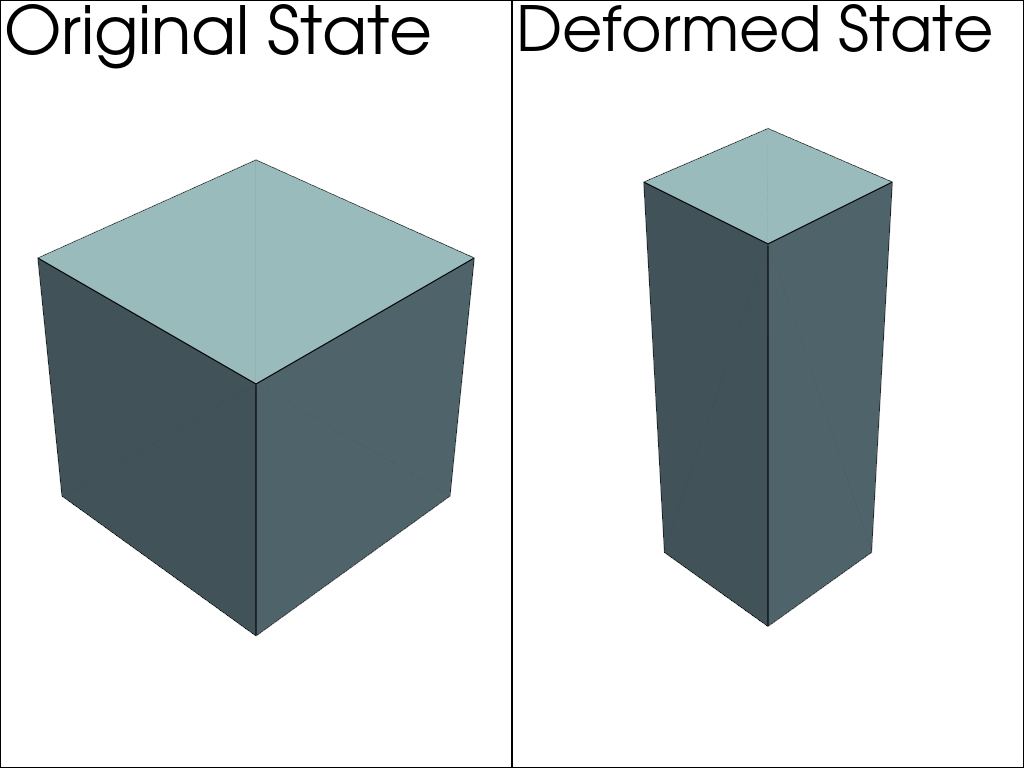

In [5]:
## import mesh

mesh = pv.read('/home/nicolas/Escritorio/Low-Dimension-Deep-Energy/Testing/unit_cube.msh')  #Orgiinal File
mesh.clear_data()

## displacement from FEM software (Vulcan)
disp = np.load('/home/nicolas/Escritorio/Low-Dimension-Deep-Energy/Testing/Desplazamientos_cubo.npy')[-1,:,:]  # The orden of this file is [time, node, dim]
mesh_def = mesh.copy()
mesh_def.points += disp

pl = pv.Plotter(shape=(1, 2))


pl.subplot(0, 0)
pl.add_text("Original State", font_size=30)
pl.add_mesh(mesh, show_edges=True, color='lightblue',opacity = 1)


pl.subplot(0, 1)
pl.add_text("Deformed State", font_size=30)
pl.add_mesh(mesh_def, show_edges=True, color='lightblue')


# # Display the window
pl.show()

In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pyvista as pv
import Elements as EL
import Material as mat
import Functions as fun
from jax import random
import numpy as np
import jax
key = random.key(0)

2024-05-06 16:39:15.834531: W external/xla/xla/service/gpu/nvptx_compiler.cc:718] The NVIDIA driver's CUDA version is 12.0 which is older than the ptxas CUDA version (12.4.131). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [11]:
test = jnp.array([[1,2,3],
                  [1,2,3],
                  [1,2,3],
                  [1,2,3],
                  [1,2,3],
                  [1,2,3],
                  [1,2,3],
                  [1,2,3],
                  ])


test_2 = jnp.delete(test, 0 , axis = 1)

In [12]:
test_2

Array([[2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3]], dtype=int32)

In [3]:

mesh_file = '/home/nicolas/Escritorio/Low-Dimension-Deep-Energy/Testing/Meshes/cube_2x2.msh'

disp = np.load('/home/nicolas/Escritorio/Low-Dimension-Deep-Energy/Testing/Displacement_Tests/Cubo_Traccion_X_2x2.npy')[-1,:,:]#*0

# points_total,connectivity_total,bc_drichlet_cells,bc_neumann_cells = fun.Hex_Reader(mesh_file,
#                                                                                 drichlet_bc= ["X_0"],plot = False)

points_total,connectivity_total,bc_drichlet_cells,bc_neumann_cells = fun.Hex_Reader(mesh_file,
                                                                                     plot = False)


material = mat.Delphino([30.0E-3,3.77],100)
constantes = material.constants
malla = EL.Hexs(material, points_total,connectivity_total)
malla.PSI(disp,constantes)
Tensor_Cauchy = malla.Cauchy(disp)
Internal_Force = malla.Internal_Force(disp)

In [5]:
def Averaged_result_Vector(Original_array,Coincident_nodes):
    New_array  = jnp.zeros((len(Coincident_nodes.keys()),Original_array.shape[-1]))
    for i in Coincident_nodes:
        tensor_indexs = jnp.array(Coincident_nodes[i])
        aux  = jnp.mean(Original_array[tensor_indexs[:,0],tensor_indexs[:,1],:],axis = 0)
        New_array  = New_array.at[i].set(aux)
    return New_array



In [7]:
aux = Averaged_result_Vector(Internal_Force,malla.nodes_repeated)
aux.shape

(27, 3)

In [4]:
Internal_Force.shape

(8, 8, 3)

# Froma General

## Derivation of total energy

## Derivada respecto desplazamientos

In [18]:
# Definir el paso de aprendizaje (learning rate)
learning_rate = 0.001

# Definir el número de iteraciones
num_iterations = 100

# Iniciar el loop de descenso de gradientes
displacement = disp.copy() #jnp.zeros_like(disp)
displacement[:4,:] *= 0
#Gradient function 
grad_PSI = jax.jacobian(malla.PSI,argnums= 0)

energias = []
for i in range(num_iterations):
    # Calcular el gradiente en el array de entrada
    gradient = grad_PSI(displacement,constantes)[0]
    # Actualizar el array de entrada utilizando el descenso de gradientes
    displacement = displacement - learning_rate * gradient

    #Energia
    energias.append(malla.PSI(displacement,constantes))
print(energias[-1])

[0.1660358]


In [19]:
displacement 

Array([[ 0.13024783,  0.13024779,  0.07465483],
       [-0.13499212,  0.13288042,  0.05998746],
       [ 0.13288042, -0.13499211,  0.05998747],
       [-0.1381799 , -0.13817991,  0.04466641],
       [-0.0079968 , -0.00799679,  0.93851554],
       [-0.2749642 , -0.00521268,  0.9403487 ],
       [-0.2775547 , -0.2775547 ,  0.9414901 ],
       [-0.00521267, -0.2749642 ,  0.9403487 ]], dtype=float32)

In [23]:
## VULCAN 
disp

array([[ 0.        ,  0.        ,  0.        ],
       [-0.28788623,  0.        ,  0.        ],
       [ 0.        , -0.28788623,  0.        ],
       [-0.28788623, -0.28788623,  0.        ],
       [ 0.        ,  0.        ,  1.        ],
       [-0.28788623,  0.        ,  1.        ],
       [-0.28788623, -0.28788623,  1.        ],
       [ 0.        , -0.28788623,  1.        ]], dtype=float32)

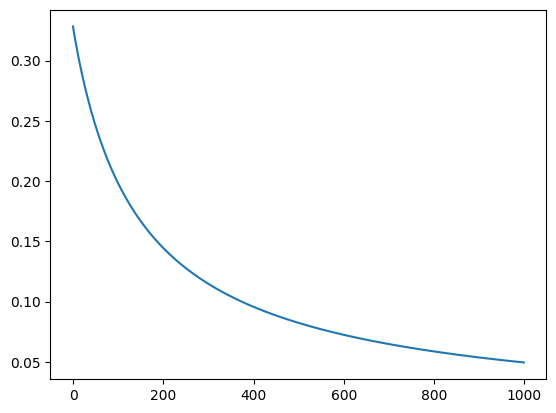

In [15]:
plt.plot(energias)

## Derivada respecto a los parametros consitutivos



In [31]:
# Definir el paso de aprendizaje (learning rate)
learning_rate = 0.000001

# Definir el número de iteraciones
num_iterations = 100

# Iniciar el loop de descenso de gradientes
constantes_obtenidas = jnp.array([0.3,0.3,0.01])

#Gradient function 
grad_PSI = jax.jacobian(malla.PSI,argnums= 1)

energias = []
for i in range(num_iterations):
    # Calcular el gradiente en el array de entrada
    gradient = grad_PSI(displacement,constantes_obtenidas)[0]
    #print(gradient)
    # Actualizar el array de entrada utilizando el descenso de gradientes
    constantes_obtenidas = constantes_obtenidas - learning_rate * gradient

    #Energia
    energias.append(malla.PSI(disp,constantes_obtenidas))
print(energias[-1])

[0.347987]


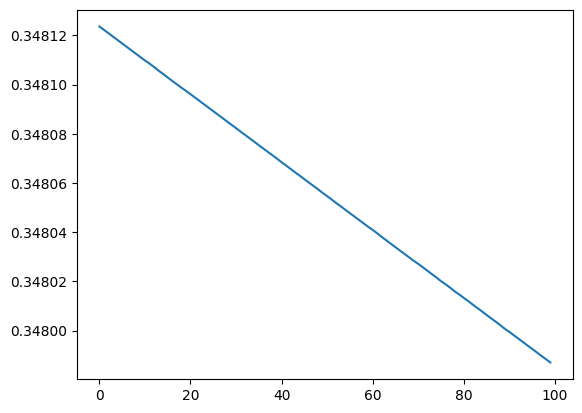

In [32]:
plt.plot(energias)

In [33]:
constantes_obtenidas

Array([0.29988378, 0.29998213, 0.01      ], dtype=float32)

In [30]:
constantes

Array([3.00e-02, 3.77e+00, 1.00e+02], dtype=float32)